In [121]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## A Quick Tour of TensorFlow
总体来说，TensorFlow可以支持跨平台，有以下几个优点：

- 用法跟NumPy很像，但支持GPU
- 支持分布式计算
- 优化计算
- 计算图可以跨平台

它的python api 如下图：

![](https://i.loli.net/2019/10/30/6bhsQuNj27f4V9W.png)

我们在实际应用中，一般95%的任务会用到它的高层api，5%用到它的底层api，如下图所示：

![](https://i.loli.net/2019/10/30/QeXaWDJE3AHjflT.png)

可以在下边网站找到更多使用TensorFlow训练的模型和资源[https://github.com/jtoy/awesome-tensorflow](https://github.com/jtoy/awesome-tensorflow)

## Using TensorFlow like Numpy
这一小节讲解像Numpy一样使用TensorFlow。

### Tensors and Operations
在tf中，张量可以是一个多维数组，也可以是一个数值。可以使用`tf.constant()`来创建一个张量。

In [122]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 一个多维数组，或者成为矩阵

<tf.Tensor: id=65279, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [123]:
tf.constant(42) # 一个scalar

<tf.Tensor: id=65280, shape=(), dtype=int32, numpy=42>

像ndarray一个，张量也有shape和dtype

In [124]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [125]:
t[:, 1:]

<tf.Tensor: id=65285, shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [126]:
t[..., 1, tf.newaxis]

<tf.Tensor: id=65289, shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

支持张量的操作符，下边仅仅展示了一部分

In [127]:
t + 10

<tf.Tensor: id=65291, shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [128]:
tf.square(t)

<tf.Tensor: id=65292, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [129]:
t @ tf.transpose(t)

<tf.Tensor: id=65295, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

如果想使用keras底层api，可以取出`keras.backend`

In [130]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: id=65300, shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Tensors and Numpy
tf的张量和Numpy的数组可以无缝相互转换。

In [131]:
a = np.array([2., 3., 4.])
tf.constant(a)

<tf.Tensor: id=65301, shape=(3,), dtype=float64, numpy=array([2., 3., 4.])>

In [132]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [133]:
tf.square(a)

<tf.Tensor: id=65303, shape=(3,), dtype=float64, numpy=array([ 4.,  9., 16.])>

In [134]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

提示： Numpy默认的初始化类型为float64， 而TensorFlow默认的是float32，因为大多数神经网络用32位存储就足够了。可以通过设置`dtype=tf.float32`。

### Type Conversions
TensorFlow的类型转换是手动的，不允许不同类型的张量进行运算，这么做的好处有两个，一个是自动类型转换消耗系统性能，
另一个是自动类型转换是隐式的，很容易忽略这些问题。

In [135]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [136]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [137]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: id=65311, shape=(), dtype=float32, numpy=42.0>

### Variables

In [138]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [139]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [140]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [141]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [142]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [143]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [144]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3], [4., 5., 6.]], indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Sparse tensors
稀松张量表示张量数据中存在大量的0

In [145]:
s = tf.SparseTensor(
    indices=[[0, 1], [1, 0], [2, 3]],
    values=[1., 2., 3.],
    dense_shape=[3, 4]
)
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [146]:
tf.sparse.to_dense(s)

<tf.Tensor: id=65347, shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [147]:
s2 = s * 2.0

In [148]:
# 稀松张量不能和其他类型的数据做+法运算，因为这种操作，稀松张量就被破坏了
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [149]:
# 可以做张量的乘法
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: id=65351, shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [150]:
s5 = tf.SparseTensor(
    indices=[[0, 2], [0, 1]],
    values=[1., 2.],
    dense_shape=[3, 4]
)
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [151]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order [Op:SparseToDense]


In [152]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: id=65360, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Tensor Arrays
tf.TensorArray 是一个张量数组，内部保存的张量必须shape和dtype相同

In [153]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [154]:
array.read(1) # 取出后，以0填充

<tf.Tensor: id=65363, shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [155]:
array.stack()

<tf.Tensor: id=65368, shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [156]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
print(mean)
print(variance)

tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tf.Tensor([4.6666665 8.666667 ], shape=(2,), dtype=float32)


### Strings

In [157]:
tf.constant(b"hello world")

<tf.Tensor: id=65378, shape=(), dtype=string, numpy=b'hello world'>

In [158]:
tf.constant("café")

<tf.Tensor: id=65379, shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [159]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: id=65380, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [160]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: id=65391, shape=(), dtype=int32, numpy=4>

In [161]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: id=65395, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [162]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [163]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: id=65397, shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [164]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [165]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


### Ragged tensors

In [166]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [167]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [168]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [169]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))


<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [170]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: id=65547, shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [171]:
r.to_tensor()

<tf.Tensor: id=65612, shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sets

In [172]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: id=65619, shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [173]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: id=65624, shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [174]:
tf.sparse.to_dense(tf.sets.difference(set2, set1)) # difference表示的是相对关系，

<tf.Tensor: id=65629, shape=(2, 2), dtype=int32, numpy=
array([[ 4,  6],
       [10,  0]], dtype=int32)>

In [175]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: id=65634, shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

## Customizing Models and Training Algorithms
### Custom loss function

In [176]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [177]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

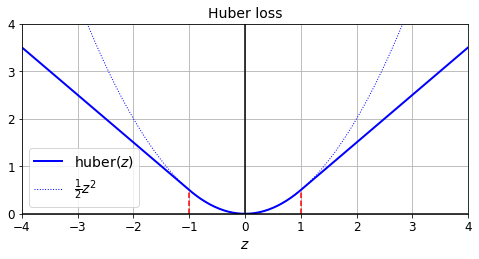

In [178]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [179]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(
    loss=huber_fn,
    optimizer="nadam", 
    metrics=["mae"]
)

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 107us/sample - loss: 0.6516 - mae: 1.0151 - val_loss: 0.2517 - val_mae: 0.5529
Epoch 2/2
11610/11610 [==============================] - 1s 49us/sample - loss: 0.2206 - mae: 0.5213 - val_loss: 0.1976 - val_mae: 0.4843


### Saving and Loading Models That Contain Custom Components
当我们自定义了一个loss函数后，我们保存模型，模型中会保存loss函数的name，因此在恢复模型的时候，还需要指定该name的真实函数。

In [180]:
model.save("my_model_with_a_custom_loss.h5")

In [181]:
model = keras.models.load_model(
    "my_model_with_a_custom_loss.h5",
    custom_objects={"huber_fn": huber_fn}
)

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 106us/sample - loss: 0.2072 - mae: 0.5003 - val_loss: 0.2018 - val_mae: 0.4856
Epoch 2/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.2019 - mae: 0.4928 - val_loss: 0.2014 - val_mae: 0.4855


以上使用的huber_fn判断error时，认为-1 ~ 1之间的值为小的error，如果我们想自由控制这个threshhold的话，我们可以自定义一个创建函数

In [182]:
def create_huber(threshhold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshhold
        squared_loss = tf.square(error) / 2
        linear_loss = threshhold * tf.abs(error) - threshhold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [183]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 103us/sample - loss: 0.2237 - mae: 0.4908 - val_loss: 0.2360 - val_mae: 0.4853
Epoch 2/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.2185 - mae: 0.4858 - val_loss: 0.2053 - val_mae: 0.4667


通过上边这种方式，虽然支持了再编译时传入threshhold，但是每次在恢复模型的时候，这个参数都要重新输入，下边演示下这个过程。

In [184]:
model.save("my_model_with_a_custom_loss_threshhold.h5")

In [185]:
model = keras.models.load_model(
    "my_model_with_a_custom_loss_threshhold.h5",
    custom_objects={"huber_fn": create_huber(2.0)}
)

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 85us/sample - loss: 0.2161 - mae: 0.4817 - val_loss: 0.2280 - val_mae: 0.4768
Epoch 2/2
11610/11610 [==============================] - 1s 49us/sample - loss: 0.2131 - mae: 0.4774 - val_loss: 0.2284 - val_mae: 0.4792


如果我们想保存这个threshold，就需要自定义继承自keras.losses.Loss的类。tf在保存模型时，会调用其内部的`get_config()`方法，因此我们需要在这个方法中，把threshold保存进去。

In [186]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshhold=1.0, **kwargs):
        self.threshhold = threshhold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshhold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshhold * tf.abs(error) - self.threshhold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshhold": self.threshhold}

In [187]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 110us/sample - loss: 0.8551 - mae: 0.9850 - val_loss: 0.5805 - val_mae: 0.6777
Epoch 2/2
11610/11610 [==============================] - 1s 53us/sample - loss: 0.2559 - mae: 0.5211 - val_loss: 0.4196 - val_mae: 0.5879


In [188]:
model.save("my_model_with_a_custom_loss_class.h5")

In [189]:
# model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={"HuberLoss": HuberLoss})

# model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

### Other Custom Functions
在大多数时间内，我们都使用类似上边代码中的函数或类别，包括losses, regularizers, constraints, initializers, metrics,activation functions, layers, full models。这么多神经网络的核心内容，我们都可以custom。 

In [190]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [191]:
tf.reduce_sum([[1], [2], [3]])

<tf.Tensor: id=86589, shape=(), dtype=int32, numpy=6>

In [192]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(
        1,
        activation=my_softplus,
        kernel_regularizer=my_l1_regularizer,
        kernel_initializer=my_glorot_initializer,
        kernel_constraint=my_positive_weights
    )
])

model.compile(loss="mse", optimizer="nadam", metric=["mae"])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 102us/sample - loss: 1.5798 - val_loss: inf
Epoch 2/2
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5827 - val_loss: inf


In [193]:
model.save("my_model_with_many_custom_parts.h5")

In [194]:
# TODO: 
"""
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer(0.01),
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })
"""

'\nmodel = keras.models.load_model(\n    "my_model_with_many_custom_parts.h5",\n    custom_objects={\n       "my_l1_regularizer": my_l1_regularizer(0.01),\n       "my_positive_weights": my_positive_weights,\n       "my_glorot_initializer": my_glorot_initializer,\n       "my_softplus": my_softplus,\n    })\n'

In [195]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def call(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [196]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(
        1,
        activation=my_softplus,
        kernel_regularizer=MyL1Regularizer(0.01),
        kernel_initializer=my_glorot_initializer,
        kernel_constraint=my_positive_weights
    )
])

model.compile(loss="mse", optimizer="nadam", metric=["mae"])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 128us/sample - loss: 1.5869 - val_loss: 1.9949
Epoch 2/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.6274 - val_loss: 1.2327


In [197]:
model.save("my_model_with_many_custom_parts.h5")

In [198]:
# model = keras.models.load_model(
#     "my_model_with_many_custom_parts.h5",
#     custom_objects={
#        "my_l1_regularizer": MyL1Regularizer,
#        "my_positive_weights": my_positive_weights,
#        "my_glorot_initializer": my_glorot_initializer,
#        "my_softplus": my_softplus,
#     })

### Custom Metrics
Warning: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:

- the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
- the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

举个例子，我们有一个二元分类器，第一个batch中，true positive 有4个，预测为positive有5个，也就是说，有一个预测错误了，那么这时候的精度为4/5为80%，第二batch，true positive 有0个，错误预测3个，那么这一batch的精度为0，前两个的精度为40%。

但是metric，不是这样算的， 它是全部正确的数除以总数，也就是4/8 为50%。

它会记录整个过程中的某写值，这种计算方式成为streaming metrics。

In [199]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.)])

model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 90us/sample - loss: 1.8537 - huber_fn: 0.7876
Epoch 2/2
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5842 - huber_fn: 0.2583


In [200]:
model.compile(loss=create_huber(2.), optimizer="nadam", metrics=[create_huber(2.)])

In [201]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 101us/sample - loss: 0.1168 - huber_fn: 0.2367
Epoch 2/2
11610/11610 [==============================] - 1s 46us/sample - loss: 0.1123 - huber_fn: 0.2270


In [202]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11678683142740083, 0.11744123564995271)

In [203]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: id=99256, shape=(), dtype=float32, numpy=0.8>

In [204]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: id=99303, shape=(), dtype=float32, numpy=0.5>

In [205]:
precision.result()

<tf.Tensor: id=99312, shape=(), dtype=float32, numpy=0.5>

In [206]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [207]:
precision.reset_states()

In [208]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [209]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: id=99359, shape=(), dtype=float32, numpy=14.0>

In [210]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: id=99390, shape=(), dtype=float32, numpy=7.0>

In [211]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [212]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [213]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [214]:
# model.fit(X_train_scaled, y_train, epochs=2)

## Custom Layers
有一些layer是没有weights的，可以使用下边这种方式来处理。

In [215]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [216]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: id=99547, shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

对于回归任务，如果需要预测的值是positive并且存在不同的scales，比如0.001， 10， 100000 ，在最后添加一个exponential layer 很有必要。

In [217]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer,
])

model.compile(loss="mse", optimizer="nadam")

model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    validation_data=(X_valid_scaled, y_valid)
)

model.evaluate(X_test_scaled, y_test)

nan

In [218]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation=keras.activations.get(activation)
    def build(self, batch_input_shape):
        print("==", batch_input_shape.as_list()[:-1])
        self.kernel = self.add_weight(name="kernel", shape=[batch_input_shape[-1], self.units])
        self.bias = self.add_weight(name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape)
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    def compute_output_shape(self, batch_input_shape):
        print("==_+_+_+__+_+_")
        # print(tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units]))
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": keras.activations.serialize(self.activation)}

In [219]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

model.compile(loss="mse", optimizer="nadam")

model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    validation_data=(X_valid_scaled, y_valid)
)

== [None]
== [None]
Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 98us/sample - loss: 1.7101 - val_loss: 2.3730
Epoch 2/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6065 - val_loss: 0.6987
Epoch 3/5
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4848 - val_loss: 0.4787
Epoch 4/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4299 - val_loss: 0.4049
Epoch 5/5
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4027 - val_loss: 0.4736


In [220]:
model.save("my_model_with_a_custom_layer.h5")

In [221]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5", custom_objects={"MyDense": MyDense})

== [None]
== [None]


对于有多个输入层的处理方式是，传入的数据格式为字典

In [222]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        print(X)
        X1, X2 = X
        return X1 + X2, X1 * X2
    
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        print("===")
        return [batch_input_shape1, batch_input_shape2]

In [223]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

(<tf.Tensor 'input_3:0' shape=(None, 2) dtype=float32>, <tf.Tensor 'input_4:0' shape=(None, 2) dtype=float32>)


In [224]:
print(MyMultiLayer()((inputs1, inputs2)))

(<tf.Tensor 'input_3:0' shape=(None, 2) dtype=float32>, <tf.Tensor 'input_4:0' shape=(None, 2) dtype=float32>)
(<tf.Tensor 'my_multi_layer_3/Identity:0' shape=(None, 2) dtype=float32>, <tf.Tensor 'my_multi_layer_3/Identity_1:0' shape=(None, 2) dtype=float32>)


In [225]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X
        
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [226]:
model.compile(loss="mse", optimizer="nadam")
model.fit(
    X_train_scaled, 
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3912 - val_loss: 0.3615
Epoch 2/2
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3779 - val_loss: 0.5536


## Custom Model
自定义模型这个功能很强大，基于此我们可以定制各种各样的模型

In [227]:
X_new_scaled = X_test_scaled

In [228]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.n_layers = n_layers
        self.n_neurons = n_neurons
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal") for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "n_layers": self.n_layers, "n_neurons": self.n_neurons}

In [229]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.hidden1 = keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "output_dim": self.output_dim}

In [230]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 181us/sample - loss: 5.3022
Epoch 2/5
11610/11610 [==============================] - 1s 57us/sample - loss: 1.4829
Epoch 3/5
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6444
Epoch 4/5
11610/11610 [==============================] - 1s 58us/sample - loss: 0.8442
Epoch 5/5
11610/11610 [==============================] - 1s 58us/sample - loss: 2.0899


In [231]:
score = model.evaluate(X_test_scaled, y_test)
score

0.7059432318044263

In [232]:
y_pred = model.predict(X_new_scaled)

In [233]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1,
    block1,
    block1,
    block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 141us/sample - loss: 0.6676
Epoch 2/5
11610/11610 [==============================] - 1s 57us/sample - loss: 0.6705
Epoch 3/5
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4807
Epoch 4/5
11610/11610 [==============================] - 1s 55us/sample - loss: 0.9774
Epoch 5/5
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4443


### Losses and Metrics Based on Model Internals
如果我们想在模型内部操作loss或者metrics的话，需要使用`add_loss()`方法，接下来，我们使用下边的代码演示这样一个案例。

我们先建立一个5个影隐藏层的网络，然后再添加一个reconstruction的隐藏层，该层于输入层的神经元个数相同。然后计算该层与输入层的平方差。然后把该平方差乘以一个基数后加到主模型的loss上，。这个基数不能很大，不然会影响主模型的loss。

这么做的目的是，能够让网络尽可能的保留输入信息。

In [234]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal") for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [235]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 163us/sample - loss: 0.8105
Epoch 2/2
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4459


In [236]:
y_pred = model.predict(X_test_scaled)

## Computing Gradients Using Autodiff
TensorFlow使用反向传播的算法来计算变量的梯度。

我们先定义一个简单的函数：

In [237]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

学过微积分的应该都明白。f对w1的偏导数为$6w1 + 2w2$,对w2的偏导数为$2w1$。假设w1=5，w2=3 ,那么他们的偏导数为36，10 。

那么在计算机中应该如何计算函数的梯度呢？ 

一种方法是，相对于每个参数，计算他们每一小步的变化率，这样做的缺点是计算量很大。计算的值只是一个近似值。

In [238]:
w1, w2 = 5, 3
eps = 1e-6
(f((w1 + eps), w2) - f(w1, w2)) / eps

36.000003007075065

In [239]:
(f(w1, (w2 + eps)) - f(w1, w2)) / eps

10.000000003174137

tf中使用`tf.GradientTape()`来把函数放入上下文，然后调用`gradient()`函数计算地图。

In [240]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: id=130853, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=130845, shape=(), dtype=float32, numpy=10.0>]

 注意： 调用gradient后，就会释放上下文，如果再次调用就会抛出异常

In [241]:
with tf.GradientTape() as tape:
    z= f(w1, w2)
dz_w1 = tape.gradient(z, w1)
try:
    dz_w2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


异常给出的解释是，如果调用多次，需要设置persistent为True， 但是在最终调用完成后，需要del tape

In [242]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
dz_w1 = tape.gradient(z, w1)
dz_w2 = tape.gradient(z, w2)
del ta

In [244]:
dz_w1, dz_w2

(<tf.Tensor: id=130901, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=130906, shape=(), dtype=float32, numpy=10.0>)

如果给的是tf.constant. 默认返回的值为None， 需要在上下文中通过watch来查看其值

In [245]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
gr

[None, None]

In [247]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: id=130965, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=130957, shape=(), dtype=float32, numpy=10.0>]

如果要对一组函数求导怎么办呢？ 默认的 他们把这一组函数相加后，再求导

In [248]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: id=131041, shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: id=131042, shape=(), dtype=float32, numpy=30.0>]

我们验证一下计算的结果，f对w1的偏导数为$6w1 + 2w2$,对w2的偏导数为$2w1$。假设w1=5，w2=3，那么z1=f(5, 5), z1对w1的偏导数为6*5+2*5，值为40，z2=f(5, 8), z2对w1的偏导数为6*5+2*8，值为46，z3=f(5, 10), z3对w1的偏导数为6*5+2*10，值为50， 这三个值相加 40+46+50等于136。同样，我们用代码也可以验证

In [249]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
s = tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
print(s)
del tape

tf.Tensor([136.  30.], shape=(2,), dtype=float32)


如果想获取一组函数中的单独的偏导数，只需要调用`jabobian()`函数就可以了，下边在演示一下如何计算二阶偏导数的方法，由此可以引申出更多阶的求导方法。

In [250]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians =  [hessian_tape.gradient(jacobian, [w1, w2]) for jacobian in jacobians]
del hessian_tape

In [253]:
jacobians

[<tf.Tensor: id=131150, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=131142, shape=(), dtype=float32, numpy=10.0>]

In [254]:
hessians

[[<tf.Tensor: id=131159, shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: id=131161, shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: id=131166, shape=(), dtype=float32, numpy=2.0>, None]]

还有更多的控制，我们知道tf使用的是反向传播求导，如果我们想在反向求导的时候，忽略loss中的某些表达式，也可以实现

In [255]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z= f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: id=131186, shape=(), dtype=float32, numpy=30.0>, None]

解释一下，对于上边代码中的函数f，由于在求导的时候，禁止了w2的计算，因此所有对于w2的求导就都变成了None。

有时候，对于某些函数，可能会返回Nan

In [256]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1)

<tf.Tensor: id=131191, shape=(), dtype=float32, numpy=30.0>

In [257]:
tf.math.log(tf.exp(tf.constant(100., dtype=tf.float32)) + 1)

<tf.Tensor: id=131196, shape=(), dtype=float32, numpy=inf>

这是因为数值超越了最大值造成的，在做除法的时候，造成了无限大除以无限大，因此tf会返回Nan

In [258]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)
tape.gradient(z, [x])

[<tf.Tensor: id=131212, shape=(), dtype=float32, numpy=nan>]

In [259]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [260]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_better_softplus(x)
tape.gradient(z, [x])

[<tf.Tensor: id=131232, shape=(), dtype=float32, numpy=1.0>]

上边代码中，通过@tf.custom_gradient 可以给函数额外附加一个单独计算梯度的方法，函数正常求值的时候走返回的第一个值，求梯度的时候，走给的自定义梯度函数。

我们也可以通过tf.where，做一些判断

In [268]:
def my_better_softplus(z):
    return tf.where(z > 30, z, tf.math.log(tf.exp(z) + 1.))

In [269]:
x = tf.Variable(1000.)
with tf.GradientTape() as tape:
    z = my_better_softplus(x)
tape.gradient(z, [x])

[<tf.Tensor: id=131356, shape=(), dtype=float32, numpy=nan>]

### Custom Training Loops
自定义循环有很多步骤，我们首先定义一个模型：

In [270]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

写一个随机生成batch的方法

In [271]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

写一个打印进度的函数

In [272]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = "_".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{}".format(iteration, total) + metrics, end=end)

In [275]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50loss: 0.0900_mean_square: 858.5000


上边代码中的进度是没有进度条的，下边的代码可以实现这个功能

In [276]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [277]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [278]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = "_".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [279]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900_mean_square: 858.5000


定义好在循环中用到的外部变量

In [280]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [284]:
for epoch in range(1, n_epochs+ 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        # 随机取出batch数据
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            # 计算预测值
            y_pred = model(X_batch)
            # 计算主要loss
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            # 把主要loss和次要loss相加。如果有正则化，可能会有次loss
            loss = tf.add_n([main_loss] + model.losses)
        # 计算梯度
        gradients = tape.gradient(loss, model.trainable_variables)
        # 根据梯度计算训练变量
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        #  添加约束
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        # 求loss的均值
        mean_loss(loss)
        # 计算metrcs
        for metric in metrics:
            metric(y_batch, y_pred)
        # 打印进度
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 [==============================] - mean: 0.6304_mean_absolute_error: 0.5141
Epoch 2/5
11610/11610 [==============================] - mean: 0.6153_mean_absolute_error: 0.5068
Epoch 3/5
11610/11610 [==============================] - mean: 0.6252_mean_absolute_error: 0.5089
Epoch 4/5
11610/11610 [==============================] - mean: 0.6467_mean_absolute_error: 0.5145
Epoch 5/5
11610/11610 [==============================] - mean: 0.6408_mean_absolute_error: 0.5192


In [287]:
m = tf.keras.metrics.Mean()
m([1, 3, 5, 7])
print('Final result: ', m.result().numpy())  # Final result: 4.0

Final result:  4.0


In [288]:
m([1, 3, 5, 7, 30])
print('Final result: ', m.result().numpy())  # Final result: 4.0

Final result:  6.888889


## TensorFlow Functions

In [290]:
def cube(x):
    return x ** 3

In [291]:
cube(2)

8

In [292]:
cube(tf.constant(2.0))

<tf.Tensor: id=1024717, shape=(), dtype=float32, numpy=8.0>

In [294]:
tf_cube = tf.function(cube)
tf_cube

In [295]:
tf_cube(2)

<tf.Tensor: id=1024723, shape=(), dtype=int32, numpy=8>

In [296]:
tf_cube(tf.constant(2.0))

<tf.Tensor: id=1024731, shape=(), dtype=float32, numpy=8.0>

In [298]:
tf_cube.python_function(2)

8

### TF Functions and Concrete Functions
tf的函数本质上是多态的，针对不同的输入组合，它会自动生成相对应的concrete function，这些输入组合被称为输入信号。

因此，对于tf的函数而言，相同的输入信号，tf会复用以前的concrete function。 。比如调用`tf_cube(tf.constant(2.))`后再调用`tf_cube(tf.constant(3.))`，使用的就是同一个concrete function。但是如果调用`tf_cube(tf.constant([2.]))`,就会生成一个新的concrete function。

我们再以`tf_cube(2)`和`tf_cube(tf.constant(2.))`为例，说明一下这其中的区别。

![](https://i.loli.net/2019/11/10/zZOICxHVQ8nua65.png)

上图中的根函数为tf_cube, 当输入设置2的时候，生成了左边的结构，它包含两部分，一个是FunctionDef，表示函数定义，用来定义输入输出，另一是FuncGraph，表示函数图，用于说明函数计算过程。

对于左边的concrete function而言，图的机构生成了一个固定的数值8，函数定义部分，没有输入，说明使用该concrete function，不管输入什么，都是返回结果8.

对于右边的图的结构，接受一个类型为floate32的输入，然后计算它的平方在输出。

In [299]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.))

In [300]:
concrete_function.graph

In [301]:
concrete_function(tf.constant(2.))

<tf.Tensor: id=1024734, shape=(), dtype=float32, numpy=8.0>

In [302]:
concrete_function is tf_cube.get_concrete_function(tf.constant(3.))

True

### Exploring Function Definitions and Graphs

In [303]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [304]:
def a(y):
    return y ** 5

In [305]:
tf_a = tf.function(a)
tf_a_conrect = tf_a.get_concrete_function(tf.constant(5.))
ops1 = tf_a_conrect.graph.get_operations()
ops1

[<tf.Operation 'y' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [306]:
pow_op = ops[2]
list(pow_op.input)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [307]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [309]:
concrete_function.graph.get_operation_by_name("x")

<tf.Operation 'x' type=Placeholder>

In [310]:
concrete_function.graph.get_tensor_by_name("Identity:0")

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [311]:
concrete_function.function_def.signature

name: "__inference_cube_1024730"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

## How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [315]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [316]:
result = tf_cube(tf.constant(2.))

print: Tensor("x:0", shape=(), dtype=float32)


In [317]:
result

<tf.Tensor: id=1024754, shape=(), dtype=float32, numpy=8.0>

从上边的打印，可以看出来，result的结果没什么问题。print函数是python函数，并不能编译到tf的graph中，因此在生成concrete function的时候只会调用一次，除非参数的类型变了，生成另一个新的concrete function。

In [318]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1. , 2.]]))
result = tf_cube(tf.constant([[1., 2.], [3., 4.]]))
result = tf_cube(tf.constant([[1., 2.], [3., 4.], [5., 6.]]))

W1112 10:44:05.637765 140734905206208 def_function.py:474] 5 out of the last 5 calls to <function tf_cube at 0x12675f8c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/beta/tutorials/eager/tf_function#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.
W1112 10:44:05.652945 140734905206208 def_function.py:474] 6 out of the last 6 calls to <function tf_cube at 0x12675f8c8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://w

In [319]:
result = tf_cube(tf.constant([[7., 7.], [7., 7.], [7., 7.]]))

如果我们想为函数自定一个固定的参数类型，也就是固定参数签名。如果参数类型不匹配，就会报错

In [320]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2]

In [321]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)
preprocessed_images = shrink(img_batch_2)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [322]:
preprocessed_images

<tf.Tensor: id=1024815, shape=(50, 14, 14), dtype=float32, numpy=
array([[[0.86967194, 0.04509377, 0.45983696, ..., 0.98567295,
         0.39286077, 0.63967335],
        [0.21514261, 0.231009  , 0.8380784 , ..., 0.12492037,
         0.32979465, 0.7644367 ],
        [0.39345038, 0.27786016, 0.14277947, ..., 0.6294341 ,
         0.24087596, 0.28214848],
        ...,
        [0.65740764, 0.9197531 , 0.01626694, ..., 0.30248868,
         0.07380021, 0.73587334],
        [0.04804504, 0.7267916 , 0.12085998, ..., 0.8744234 ,
         0.09868002, 0.46248972],
        [0.73392856, 0.8779386 , 0.92892027, ..., 0.12233651,
         0.07616198, 0.06904387]],

       [[0.6245496 , 0.19587457, 0.01115322, ..., 0.5369823 ,
         0.21364594, 0.56784976],
        [0.81553376, 0.46618676, 0.8141618 , ..., 0.13088906,
         0.0078851 , 0.32541347],
        [0.02349722, 0.79896283, 0.87042177, ..., 0.7304561 ,
         0.17226493, 0.9305755 ],
        ...,
        [0.8311995 , 0.7716377 , 0.7595573

可以看出，当指定了input_signature后。 concrete function就只生成一次。

In [323]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    p = shrink(img_batch_3)
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.78602743 0.10465968]
  [0.36942482 0.7535137 ]]

 [[0.60974383 0.9704398 ]
  [0.16899133 0.05010164]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


## Using Autograph To capture Control Flow
如果我们在函数中用到了循环，在生成的图中，可能会包含很多的op

In [324]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [325]:
add_10(tf.constant(5))

<tf.Tensor: id=1024849, shape=(), dtype=int32, numpy=15>

In [326]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

解决这个问题可以使用`tf.while_loop()`

In [327]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [328]:
add_10(tf.constant(5))

<tf.Tensor: id=1024893, shape=(), dtype=int32, numpy=15>

In [329]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=While>,
 <tf.Operation 'while/Identity' type=Identity>,
 <tf.Operation 'while/Identity_1' type=Identity>,
 <tf.Operation 'while/Identity_2' type=Identity>,
 <tf.Operation 'while/Identity_3' type=Identity>,
 <tf.Operation 'Identity' type=Identity>]

另一种方法就是修改`range()`为`tf.range()`

In [330]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

In [331]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=While>,
 <tf.Operation 'while/Identity' type=Identity>,
 <tf.Operation 'while/Identity_1' type=Identity>,
 <tf.Operation 'while/Identity_2' type=Identity>,
 <tf.Operation 'while/Identity_3' type=Identity>,
 <tf.Operation 'while/Identity_4' type=Identity>,
 <tf.Operation 'while/Identity_5' type=Identity>,
 <tf.Operation 'Identity' type=Identity>]

## Handling Variables and Other Resources in TF Functions
像变量 queues datasets 等等，在tf中被认为是resources，这些东西当做变量传入函数参数时，实际上传入的是变量的引用

In [332]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [333]:
increment(counter)
increment(counter)

<tf.Tensor: id=1024963, shape=(), dtype=int32, numpy=2>

In [334]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [335]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

increment(counter)
increment(counter)

<tf.Tensor: id=1024979, shape=(), dtype=int32, numpy=0>

In [336]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "c"
type: DT_RESOURCE

In [337]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)
    
    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [338]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: id=1024995, shape=(), dtype=int32, numpy=2>

In [339]:
def display_tf_code(func, experimental_optional_features=None):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func, experimental_optional_features=experimental_optional_features)
    display(Markdown("```python\n{}\n```".format(code)))

In [340]:
display_tf_code(add_10)

```python
def tf__add_10(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('add_10', 'add_10_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as add_10_scope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def loop_body(iterates, x):
      i = iterates
      x += 1
      return x,
    x, = ag__.for_stmt(ag__.converted_call(tf.range, add_10_scope.callopts, (10,), None, add_10_scope), None, loop_body, get_state, set_state, (x,), ('x',), ())
    do_return = True
    retval_ = add_10_scope.mark_return_value(x)
  do_return,
  return ag__.retval(retval_)

```

## Using TF Functions with tf.keras(or Not)

In [341]:
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [342]:
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [343]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name="kernel",
            shape=(input_shape[1], self.units),
            initializer="uniform",
            trainable=True
        )
        self.bias = self.add_weight(
            name="bias",
            shape=(self.units,),
            initializer="zeros",
            trainable=True
        )
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.bias)

In [344]:
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

In [345]:
model = MyModel()

In [346]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [347]:
model.fit(
    X_train_scaled, 
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing metric my_mae()
Tracing loss my_mse()
Train on 11610 samples, validate on 3870 samples
Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
10752/11610 [==========================>...] - ETA: 0s - loss: 1.3312 - my_mae: 0.7978Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
11610/11610 [==============================] - 1s 127us/sample - loss: 1.2668 - my_mae: 0.7744 - val_loss: 0.5985 - val_my_mae: 0.4733
Epoch 2/2
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4475 - my_mae: 0.4733 - val_loss: 0.7195 - val_my_mae: 0.4771


In [348]:
model = MyModel(dynamic=True)
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])
model.fit(
    X_train_scaled[:64], 
    y_train[:64],
    epochs=2,
    validation_data=(X_valid_scaled[:64], y_valid[:64])
)

Train on 64 samples, validate on 64 samples
Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
32/64 [==============>...............] - ETA: 0s - loss: 5.4319 - my_mae: 1.9745Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
64/64 [==============================] - 0s 2ms/sample - loss: 5.5393 - my_mae: 2.0167 - val_loss: 5.6626 - val_my_mae: 2.1397
Epoch 2/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
32/64 [==============>...............] 

## Custom Optimizers

In [349]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [350]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 70us/sample - loss: 3.6732
Epoch 2/5
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3029
Epoch 3/5
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8070
Epoch 4/5
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6858
Epoch 5/5
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6483


## Exercises

#### 1. 简要概括一下TensorFlow，主要特性是什么？能够说出其他的dl库吗？

TensorFlow是一个开源库，适用于大型数值计算问题，它的core与numpy很相似，但是它支持GPU优化计算，支持分布式计算，计算图形分析，基于逆向传播的autodiff优化api和其他强大的api，比如`tf.keras`, `tf.data`, `tf.image`, `tf.signal`等等。

其他的比较流行的深度学习库有PyTorch, MXNet, Micrisoft Cognitive Toolkit, Theano, Caffe2, Chainer.

#### 2. TensorFlow是否可以替代Numpy？ 他们的不同点是什么？

他们还是有一些不同的地方，首先函数的名称不一样，比如`tf.reduce_sum()`和`np.sum()`.第二，某些函数的行为不一样，比如`tf.transpose()`会创建一份变换后的copy数据，Numpy的`.T`是在原有数据上变换。第三，Numpy的数组是可变的，TensorFlow是不可变的。

#### 3. `tf.range(10)`和`tf.constant(np.arange(10))`能否或得同样的结果？

这两个函数都会生成一个0到9的数组，不同的是前者数组中的值的类型为int32，后者是int64，TensorFlow默认类型为32位，Numpy默认类型为64位。

#### 4. 说出除了tensors之外的其他6个数据结构？

sparse tensors, tensor arrays, ragged tensors, queues, string tensors, sets.

#### 5. 自定义loss可以直接写一个函数，也可以写一个`keras.losses.Loss`的子类。分别在什么场景下使用？

一般情况下，应该首先考虑使用一般的python函数，当自定义的loss需要很多参数或者多种状态时，应该考虑使用子类的实现方案。重写`__init__()`和`call()`,如果需要保存参数，需要重写`get_config()`。

#### 6. 自定义metric可以直接写一个函数，也可以写一个`keras.metrics.Metric`的子类。分别在什么场景下使用？

这个和自定义loss很像，特殊的地方在于如何计算metric，基于epoch或者基于batch。重写`__init__()`,`update_state()`,`result()`,别忘了调用`reset_states()`.如果需要保存参数，需要重写`get_config()`。

#### 7. 什么时候需要自定义layer和model？

当需要自定义layer或模型结构的时候

#### 8. 在自定义training loop时，有哪些注意事项？

在除非必要的情况下，否则不需要自定义training loop

#### 9. Keras组件是否可以包含原生python代码？ 或者必须转为TF Function？

Custom Keras components should be convertible to TF Functions, which means they should stick to TF operations as much as possible and respect all the rules listed in “TF Function Rules”. If you absolutely need to include arbitrary Python code in a custom component, you can either wrap it in a tf.py_function() operation (but this will reduce performance and limit your model’s portability) or set dynamic=True when creating the custom layer or model (or set run_eagerly=True when calling the model’s compile() method).

#### 10. 转为TF Function的主要原则是什么？

#### 11. 什么情况下需要创建dynamic的模型，如何实现？ 为何不要把你的模型全部设置为dynamic？

使用dynamic模型的最大用处是调试，在该模式下，不会生成TF Function，可以调试任何的原生python代码，导入外部库。要想使用该模式，在创建模型的时候设置`dynamic=True`,或者在compile时候设置`run_eagerly=True`即可。启用dynamic模式后，就无法使用TensorFlow提供的优化功能，也无法生成graph。